In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge, RidgeCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go
import statsmodels.api as sm
py.offline.init_notebook_mode(connected=True)

In [2]:
stats = pd.read_csv(r"C:\Users\Ahmed's Computer\Downloads\county_facts.csv" , )
pd.set_option('display.max_columns', 50)
stats.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,RHI325214,RHI425214,RHI525214,RHI625214,RHI725214,RHI825214,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,...,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,50.8,77.4,13.2,1.2,5.4,0.2,2.5,17.4,62.1,84.9,12.9,20.7,86.0,28.8,21263779,...,176700,115610216,2.63,28155,53046,15.4,7488353,118266253,2.0,23005620,27092908,7.1,0.9,5.7,0.1,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,51.5,69.7,26.7,0.7,1.3,0.1,1.5,4.1,66.2,85.0,3.5,5.2,83.1,22.6,388865,...,122500,1838683,2.55,23680,43253,18.6,97578,1603100,1.1,311578,382350,14.8,0.8,1.8,0.1,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,77.9,18.7,0.5,1.1,0.1,1.8,2.7,75.6,85.0,1.6,3.5,85.6,20.9,5922,...,136200,20071,2.71,24571,53682,12.1,817,10120,2.1,2947,4067,15.2,0.0,1.3,0.0,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,87.1,9.6,0.7,0.9,0.1,1.6,4.6,83.0,82.1,3.6,5.5,89.1,27.7,19346,...,168600,73283,2.52,26766,50221,13.9,4871,54988,3.7,16508,19035,2.7,0.4,1.0,0.0,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,50.2,47.6,0.6,0.5,0.2,0.9,4.5,46.6,84.8,2.9,5.0,73.7,13.4,2120,...,89200,9200,2.66,16829,32911,26.7,464,6611,-5.6,1546,1667,0.0,0.0,0.0,0.0,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [3]:
stats.shape

(3195, 54)

In [4]:
stats12 = stats[['fips','area_name','state_abbreviation','PST045214','AGE775214','RHI225214','RHI725214','RHI825214','EDU635213','EDU685213','INC110213','PVY020213','POP060210','RHI425214','SBO001207','SEX255214']].copy()
stats12.rename(columns={'PST045214': 'Population', 'AGE775214': 'Age > 65','RHI225214':'Black','RHI725214':'Latino','RHI825214':'White','EDU635213':'HighSchool','EDU685213':'College','INC110213':'Median Household','PVY020213':'Poverty level','POP060210':'Population PSMile', 'RHI425214':'Asian', 'SBO001207':'Firms','SEX255214':'Females'}, inplace=True)
stats12

,fips,area_name,state_abbreviation,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females
0,0,United States,NaN,318857056,14.5,13.2,17.4,62.1,86.0,28.8,53046,15.4,87.4,5.4,27092908,50.8
1,1000,Alabama,NaN,4849377,15.3,26.7,4.1,66.2,83.1,22.6,43253,18.6,94.4,1.3,382350,51.5
2,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4
3,1003,Baldwin County,AL,200111,18.7,9.6,4.6,83.0,89.1,27.7,50221,13.9,114.6,0.9,19035,51.2
4,1005,Barbour County,AL,26887,16.5,47.6,4.5,46.6,73.7,13.4,32911,26.7,31.0,0.5,1667,46.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,45010,9.5,1.5,15.8,79.7,91.0,18.1,71525,11.3,4.2,0.9,4052,48.1
3191,56039,Teton County,WY,22930,12.2,1.2,15.2,80.9,96.8,48.7,68078,8.2,5.3,1.3,5974,48.2
3192,56041,Uinta County,WY,20904,11.0,0.9,9.2,87.3,89.2,18.9,58515,13.3,10.1,0.5,1983,49.6
3193,56043,Washakie County,WY,8322,20.1,0.8,13.9,82.7,90.5,23.6,47104,12.1,3.8,0.7,845,49.3


In [5]:
#Drop US and States
stats12 = stats12.dropna()

In [6]:
stats12.head(10)

,fips,area_name,state_abbreviation,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females
2,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4
3,1003,Baldwin County,AL,200111,18.7,9.6,4.6,83.0,89.1,27.7,50221,13.9,114.6,0.9,19035,51.2
4,1005,Barbour County,AL,26887,16.5,47.6,4.5,46.6,73.7,13.4,32911,26.7,31.0,0.5,1667,46.6
5,1007,Bibb County,AL,22506,14.8,22.1,2.1,74.5,77.5,12.1,36447,18.1,36.8,0.2,1385,45.9
6,1009,Blount County,AL,57719,17.0,1.8,8.7,87.8,77.0,12.1,44145,15.8,88.9,0.3,4458,50.5
7,1011,Bullock County,AL,10764,14.9,70.1,7.5,22.1,67.8,12.5,32033,21.6,17.5,0.3,417,45.3
8,1013,Butler County,AL,20296,18.0,44.0,1.2,53.1,76.3,14.0,29918,28.4,27.0,0.9,1769,53.6
9,1015,Calhoun County,AL,115916,16.0,21.1,3.5,72.9,78.6,16.1,39962,21.9,195.7,0.9,8713,51.8
10,1017,Chambers County,AL,34076,18.3,39.5,2.0,56.8,75.1,11.8,32402,24.1,57.4,0.8,1981,52.3
11,1019,Cherokee County,AL,26037,20.9,4.6,1.5,91.6,78.3,12.8,34907,21.2,46.9,0.3,2180,50.2


In [7]:
primary = pd.read_csv(r"C:\Users\Ahmed's Computer\Downloads\primary_results.csv", )
pd.set_option('display.max_columns', 50)
primary.head(7)

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078
5,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906
6,Alabama,AL,Bibb,1007.0,Democrat,Bernie Sanders,246,0.197


In [8]:
prim = pd.merge(stats12,primary)
prim

,fips,area_name,state_abbreviation,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,state,county,party,candidate,votes,fraction_votes
0,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Alabama,Autauga,Democrat,Bernie Sanders,544,0.182
1,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Alabama,Autauga,Democrat,Hillary Clinton,2387,0.800
2,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Alabama,Autauga,Republican,Ben Carson,1764,0.146
3,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Alabama,Autauga,Republican,Donald Trump,5387,0.445
4,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Alabama,Autauga,Republican,John Kasich,421,0.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17474,56041,Uinta County,WY,20904,11.0,0.9,9.2,87.3,89.2,18.9,58515,13.3,10.1,0.5,1983,49.6,Wyoming,Uinta,Democrat,Hillary Clinton,4,0.444
17475,56043,Washakie County,WY,8322,20.1,0.8,13.9,82.7,90.5,23.6,47104,12.1,3.8,0.7,845,49.3,Wyoming,Washakie,Democrat,Bernie Sanders,1,0.333
17476,56043,Washakie County,WY,8322,20.1,0.8,13.9,82.7,90.5,23.6,47104,12.1,3.8,0.7,845,49.3,Wyoming,Washakie,Democrat,Hillary Clinton,2,0.667
17477,56045,Weston County,WY,7201,18.1,0.7,4.2,91.5,90.2,17.2,55461,11.2,3.0,0.4,810,47.4,Wyoming,Weston,Democrat,Bernie Sanders,1,0.500


In [9]:
prim.drop(['county', 'state'], axis=1, inplace=True)
prim = prim.rename(columns={'state_abbreviation': 'State','area_name':'county'})

In [10]:
prim

,fips,county,State,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,party,candidate,votes,fraction_votes
0,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Democrat,Bernie Sanders,544,0.182
1,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Democrat,Hillary Clinton,2387,0.800
2,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Republican,Ben Carson,1764,0.146
3,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Republican,Donald Trump,5387,0.445
4,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Republican,John Kasich,421,0.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17474,56041,Uinta County,WY,20904,11.0,0.9,9.2,87.3,89.2,18.9,58515,13.3,10.1,0.5,1983,49.6,Democrat,Hillary Clinton,4,0.444
17475,56043,Washakie County,WY,8322,20.1,0.8,13.9,82.7,90.5,23.6,47104,12.1,3.8,0.7,845,49.3,Democrat,Bernie Sanders,1,0.333
17476,56043,Washakie County,WY,8322,20.1,0.8,13.9,82.7,90.5,23.6,47104,12.1,3.8,0.7,845,49.3,Democrat,Hillary Clinton,2,0.667
17477,56045,Weston County,WY,7201,18.1,0.7,4.2,91.5,90.2,17.2,55461,11.2,3.0,0.4,810,47.4,Democrat,Bernie Sanders,1,0.500


### Split and Proprocessing

In [11]:
democrats_raw =  prim[prim.party == "Democrat"]
republicans_raw = prim[prim.party == "Republican"]

In [12]:
democrats_raw

,fips,county,State,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,party,candidate,votes,fraction_votes
0,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Democrat,Bernie Sanders,544,0.182
1,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Democrat,Hillary Clinton,2387,0.800
7,1003,Baldwin County,AL,200111,18.7,9.6,4.6,83.0,89.1,27.7,50221,13.9,114.6,0.9,19035,51.2,Democrat,Bernie Sanders,2694,0.329
8,1003,Baldwin County,AL,200111,18.7,9.6,4.6,83.0,89.1,27.7,50221,13.9,114.6,0.9,19035,51.2,Democrat,Hillary Clinton,5290,0.647
14,1005,Barbour County,AL,26887,16.5,47.6,4.5,46.6,73.7,13.4,32911,26.7,31.0,0.5,1667,46.6,Democrat,Bernie Sanders,222,0.078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17474,56041,Uinta County,WY,20904,11.0,0.9,9.2,87.3,89.2,18.9,58515,13.3,10.1,0.5,1983,49.6,Democrat,Hillary Clinton,4,0.444
17475,56043,Washakie County,WY,8322,20.1,0.8,13.9,82.7,90.5,23.6,47104,12.1,3.8,0.7,845,49.3,Democrat,Bernie Sanders,1,0.333
17476,56043,Washakie County,WY,8322,20.1,0.8,13.9,82.7,90.5,23.6,47104,12.1,3.8,0.7,845,49.3,Democrat,Hillary Clinton,2,0.667
17477,56045,Weston County,WY,7201,18.1,0.7,4.2,91.5,90.2,17.2,55461,11.2,3.0,0.4,810,47.4,Democrat,Bernie Sanders,1,0.500


In [13]:
len(democrats_raw.fips.unique())

2798

In [14]:
republicans_raw

,fips,county,State,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,party,candidate,votes,fraction_votes
2,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Republican,Ben Carson,1764,0.146
3,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Republican,Donald Trump,5387,0.445
4,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Republican,John Kasich,421,0.035
5,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Republican,Marco Rubio,1785,0.148
6,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Republican,Ted Cruz,2482,0.205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17426,55139,Winnebago County,WI,169511,14.7,2.0,3.9,89.6,91.0,25.5,51010,12.3,384.3,2.7,10710,49.7,Republican,John Kasich,3952,0.115
17427,55139,Winnebago County,WI,169511,14.7,2.0,3.9,89.6,91.0,25.5,51010,12.3,384.3,2.7,10710,49.7,Republican,Ted Cruz,16049,0.469
17430,55141,Wood County,WI,73608,18.6,0.7,2.7,93.1,90.8,18.8,47685,11.0,94.2,2.0,6203,50.6,Republican,Donald Trump,6941,0.432
17431,55141,Wood County,WI,73608,18.6,0.7,2.7,93.1,90.8,18.8,47685,11.0,94.2,2.0,6203,50.6,Republican,John Kasich,1479,0.092


In [15]:
democrats = democrats_raw.copy()
democrats = democrats.drop(['State','votes','party', 'county', 'fips'], axis=1)

In [16]:
democrats

,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,candidate,fraction_votes
0,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Bernie Sanders,0.182
1,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Hillary Clinton,0.800
7,200111,18.7,9.6,4.6,83.0,89.1,27.7,50221,13.9,114.6,0.9,19035,51.2,Bernie Sanders,0.329
8,200111,18.7,9.6,4.6,83.0,89.1,27.7,50221,13.9,114.6,0.9,19035,51.2,Hillary Clinton,0.647
14,26887,16.5,47.6,4.5,46.6,73.7,13.4,32911,26.7,31.0,0.5,1667,46.6,Bernie Sanders,0.078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17474,20904,11.0,0.9,9.2,87.3,89.2,18.9,58515,13.3,10.1,0.5,1983,49.6,Hillary Clinton,0.444
17475,8322,20.1,0.8,13.9,82.7,90.5,23.6,47104,12.1,3.8,0.7,845,49.3,Bernie Sanders,0.333
17476,8322,20.1,0.8,13.9,82.7,90.5,23.6,47104,12.1,3.8,0.7,845,49.3,Hillary Clinton,0.667
17477,7201,18.1,0.7,4.2,91.5,90.2,17.2,55461,11.2,3.0,0.4,810,47.4,Bernie Sanders,0.500


In [17]:
train_data, test_data = train_test_split(democrats, test_size = .1, random_state = 0) 

In [18]:
y = train_data.fraction_votes
X = train_data.drop('fraction_votes', axis = 1)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.3, random_state=0)

In [20]:
from category_encoders.one_hot import OneHotEncoder

In [21]:
encoder = OneHotEncoder()
encoder.fit(X_train)
X_train = encoder.transform(X_train)
X_val = encoder.transform(X_val)

In [22]:
X_train

,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,candidate_1,candidate_2,candidate_3,candidate_4
16639,102133,18.1,0.9,8.4,84.7,87.4,15.4,47596,17.6,89.8,1.6,6121,50.4,1,0,0,0
5379,8001,19.0,0.6,2.4,95.2,86.7,19.3,45997,11.8,18.4,0.8,521,49.8,0,1,0,0
14645,111236,11.8,10.7,19.4,67.5,82.5,17.6,61194,13.3,132.4,1.0,10231,50.8,0,0,1,0
853,16367,26.8,0.4,2.3,94.6,83.6,12.9,34494,18.9,27.9,0.3,2094,50.3,1,0,0,0
8941,6219,19.6,0.3,1.8,81.4,87.0,20.5,41277,17.5,3.8,0.3,496,51.3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10738,218568,11.3,12.1,11.0,73.5,87.8,31.8,65892,9.4,318.7,2.2,18189,50.6,0,0,1,0
9810,24673,20.8,1.7,64.9,32.0,68.5,13.8,29282,29.7,8.5,0.8,1320,50.0,1,0,0,0
4087,43705,15.3,1.0,6.4,90.1,86.2,14.5,46501,13.0,83.2,1.3,3274,50.2,1,0,0,0
2863,27282,15.2,26.0,11.2,61.1,79.2,15.2,31189,26.9,74.8,0.9,2972,52.6,0,0,1,0


### Training

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error, r2_score

In [24]:
#Train using training data
RFR = RandomForestRegressor(n_estimators=500)
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [25]:
yhat = RFR.predict(X_val)

In [26]:
print("RMSLE: ", np.sqrt(mean_squared_log_error(y_val, yhat)))
print("MAE: ", mean_absolute_error(y_val, yhat))
print("RMSE:", np.sqrt(mean_squared_error(y_val, yhat)))
print("R2: ", r2_score(y_val, yhat))
print("Median Error: ", np.median(abs(y_val - yhat)))

RMSLE:  0.06175687095427109
MAE:  0.068165864214121
RMSE: 0.09143999389957916
R2:  0.7597526807405
Median Error:  0.05225600000000041


### Final Test

In [28]:
y_test = test_data.fraction_votes
X_test = test_data.drop('fraction_votes', axis = 1)

In [29]:
X_test = encoder.transform(X_test)

In [30]:
y_hat = RFR.predict(X_test)

In [31]:
print("RMSLE: ", np.sqrt(mean_squared_log_error(y_test, y_hat)))
print("MAE: ", mean_absolute_error(y_test, y_hat))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_hat)))
print("R2: ", r2_score(y_test, y_hat))
print("Median Error: ", np.median(abs(y_test - y_hat)))

RMSLE:  0.0685013490626187
MAE:  0.07268778218950266
RMSE: 0.09864915138369677
R2:  0.7242413649772592
Median Error:  0.05973999999999863


In [32]:
final_data = test_data.copy()
final_data['Predictions'] = y_hat
final_data['dif_preds'] = abs(final_data['fraction_votes'] - final_data['Predictions'])

In [33]:
final_data

,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,candidate,fraction_votes,Predictions,dif_preds
5648,17451,19.2,0.6,8.4,82.7,89.9,16.1,51670,11.5,24.6,0.4,0,50.9,Hillary Clinton,0.529,0.446336,0.082664
5601,11948,22.4,0.5,2.3,95.6,90.9,18.2,48783,10.8,20.6,0.4,1388,50.8,Uncommitted,0.000,0.000082,0.000082
17454,96389,14.3,3.4,14.3,78.7,93.3,25.1,55864,10.8,34.2,1.3,8411,49.6,Hillary Clinton,0.510,0.458598,0.051402
6264,24445,16.7,2.4,1.5,94.4,76.8,9.6,33651,25.4,74.1,0.2,1809,51.0,Bernie Sanders,0.455,0.452508,0.002492
9654,795723,12.4,41.9,22.1,32.2,83.5,32.0,55095,16.6,6211.5,5.3,67880,51.9,Bernie Sanders,0.268,0.329816,0.061816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6949,15406,12.6,45.9,1.6,51.7,72.8,18.8,61616,16.6,38.8,0.3,985,34.1,Hillary Clinton,0.801,0.809038,0.008038
10637,39132,17.5,27.3,4.2,66.4,83.0,14.7,42317,18.0,100.6,0.5,2627,51.4,Hillary Clinton,0.510,0.756188,0.246188
7704,21666,16.6,42.4,1.2,55.2,78.4,14.7,34129,21.9,51.9,0.4,1973,52.7,Bernie Sanders,0.129,0.153076,0.024076
16478,15174,7.5,15.0,35.5,38.3,82.9,26.0,71227,7.0,5632.6,10.3,1196,49.1,Hillary Clinton,0.574,0.589312,0.015312


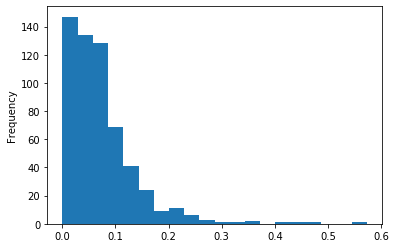

In [34]:
final_data['dif_preds'].plot.hist(bins=20)

In [35]:
RFR.feature_importances_

array([0.02344172, 0.03536895, 0.37314915, 0.04356463, 0.0229353 ,
       0.048662  , 0.02115022, 0.0188738 , 0.02321527, 0.02360648,
       0.01937815, 0.01404477, 0.02600417, 0.11558155, 0.02566107,
       0.14508459, 0.02027817])

### 2032 Elections 

In [37]:
prim32_raw = democrats_raw.copy()
prim32_raw

,fips,county,State,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,party,candidate,votes,fraction_votes
0,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Democrat,Bernie Sanders,544,0.182
1,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Democrat,Hillary Clinton,2387,0.800
7,1003,Baldwin County,AL,200111,18.7,9.6,4.6,83.0,89.1,27.7,50221,13.9,114.6,0.9,19035,51.2,Democrat,Bernie Sanders,2694,0.329
8,1003,Baldwin County,AL,200111,18.7,9.6,4.6,83.0,89.1,27.7,50221,13.9,114.6,0.9,19035,51.2,Democrat,Hillary Clinton,5290,0.647
14,1005,Barbour County,AL,26887,16.5,47.6,4.5,46.6,73.7,13.4,32911,26.7,31.0,0.5,1667,46.6,Democrat,Bernie Sanders,222,0.078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17474,56041,Uinta County,WY,20904,11.0,0.9,9.2,87.3,89.2,18.9,58515,13.3,10.1,0.5,1983,49.6,Democrat,Hillary Clinton,4,0.444
17475,56043,Washakie County,WY,8322,20.1,0.8,13.9,82.7,90.5,23.6,47104,12.1,3.8,0.7,845,49.3,Democrat,Bernie Sanders,1,0.333
17476,56043,Washakie County,WY,8322,20.1,0.8,13.9,82.7,90.5,23.6,47104,12.1,3.8,0.7,845,49.3,Democrat,Hillary Clinton,2,0.667
17477,56045,Weston County,WY,7201,18.1,0.7,4.2,91.5,90.2,17.2,55461,11.2,3.0,0.4,810,47.4,Democrat,Bernie Sanders,1,0.500


In [38]:
prim32 = prim32_raw.copy()

In [39]:
prim32['Population'] = prim['Population'] * 1.0990
prim32['Age > 65'] = prim['Age > 65'] * 1.3519
prim32['White'] = prim['White'] * .9737
prim32['Black'] = prim['Black'] * 1.0376
prim32['Latino'] = prim['Latino'] * 1.1854
prim32['Asian'] = prim['Asian'] * 1.2105

In [40]:
prim32.drop(['fraction_votes', 'fips', 'county', 'State', 'party', 'votes'], axis=1, inplace=True)

In [41]:
prim32 = encoder.transform(prim32)

In [42]:
prim32

,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,candidate_1,candidate_2,candidate_3,candidate_4
0,60879.105,18.65622,19.40312,3.20058,73.61172,85.6,20.9,53682,12.1,91.8,1.33155,4067,51.4,0,0,1,0
1,60879.105,18.65622,19.40312,3.20058,73.61172,85.6,20.9,53682,12.1,91.8,1.33155,4067,51.4,1,0,0,0
7,219921.989,25.28053,9.96096,5.45284,80.81710,89.1,27.7,50221,13.9,114.6,1.08945,19035,51.2,0,0,1,0
8,219921.989,25.28053,9.96096,5.45284,80.81710,89.1,27.7,50221,13.9,114.6,1.08945,19035,51.2,1,0,0,0
14,29548.813,22.30635,49.38976,5.33430,45.37442,73.7,13.4,32911,26.7,31.0,0.60525,1667,46.6,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17474,22973.496,14.87090,0.93384,10.90568,85.00401,89.2,18.9,58515,13.3,10.1,0.60525,1983,49.6,1,0,0,0
17475,9145.878,27.17319,0.83008,16.47706,80.52499,90.5,23.6,47104,12.1,3.8,0.84735,845,49.3,0,0,1,0
17476,9145.878,27.17319,0.83008,16.47706,80.52499,90.5,23.6,47104,12.1,3.8,0.84735,845,49.3,1,0,0,0
17477,7913.899,24.46939,0.72632,4.97868,89.09355,90.2,17.2,55461,11.2,3.0,0.48420,810,47.4,0,0,1,0


In [43]:
preds32 = RFR.predict(prim32)

In [44]:
prim32 = encoder.inverse_transform(prim32)

In [45]:
prim32

,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,candidate
0,60879.105,18.65622,19.40312,3.20058,73.61172,85.6,20.9,53682,12.1,91.8,1.33155,4067,51.4,Bernie Sanders
1,60879.105,18.65622,19.40312,3.20058,73.61172,85.6,20.9,53682,12.1,91.8,1.33155,4067,51.4,Hillary Clinton
7,219921.989,25.28053,9.96096,5.45284,80.81710,89.1,27.7,50221,13.9,114.6,1.08945,19035,51.2,Bernie Sanders
8,219921.989,25.28053,9.96096,5.45284,80.81710,89.1,27.7,50221,13.9,114.6,1.08945,19035,51.2,Hillary Clinton
14,29548.813,22.30635,49.38976,5.33430,45.37442,73.7,13.4,32911,26.7,31.0,0.60525,1667,46.6,Bernie Sanders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17474,22973.496,14.87090,0.93384,10.90568,85.00401,89.2,18.9,58515,13.3,10.1,0.60525,1983,49.6,Hillary Clinton
17475,9145.878,27.17319,0.83008,16.47706,80.52499,90.5,23.6,47104,12.1,3.8,0.84735,845,49.3,Bernie Sanders
17476,9145.878,27.17319,0.83008,16.47706,80.52499,90.5,23.6,47104,12.1,3.8,0.84735,845,49.3,Hillary Clinton
17477,7913.899,24.46939,0.72632,4.97868,89.09355,90.2,17.2,55461,11.2,3.0,0.48420,810,47.4,Bernie Sanders


In [46]:

prim32['Predictions'] = preds32 
prim32['fips'] = prim32_raw[prim32_raw.party == "Democrat"]['fips']

In [47]:
prim32

,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,candidate,Predictions,fips
0,60879.105,18.65622,19.40312,3.20058,73.61172,85.6,20.9,53682,12.1,91.8,1.33155,4067,51.4,Bernie Sanders,0.281842,1001
1,60879.105,18.65622,19.40312,3.20058,73.61172,85.6,20.9,53682,12.1,91.8,1.33155,4067,51.4,Hillary Clinton,0.677766,1001
7,219921.989,25.28053,9.96096,5.45284,80.81710,89.1,27.7,50221,13.9,114.6,1.08945,19035,51.2,Bernie Sanders,0.352856,1003
8,219921.989,25.28053,9.96096,5.45284,80.81710,89.1,27.7,50221,13.9,114.6,1.08945,19035,51.2,Hillary Clinton,0.613222,1003
14,29548.813,22.30635,49.38976,5.33430,45.37442,73.7,13.4,32911,26.7,31.0,0.60525,1667,46.6,Bernie Sanders,0.189784,1005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17474,22973.496,14.87090,0.93384,10.90568,85.00401,89.2,18.9,58515,13.3,10.1,0.60525,1983,49.6,Hillary Clinton,0.430378,56041
17475,9145.878,27.17319,0.83008,16.47706,80.52499,90.5,23.6,47104,12.1,3.8,0.84735,845,49.3,Bernie Sanders,0.459028,56043
17476,9145.878,27.17319,0.83008,16.47706,80.52499,90.5,23.6,47104,12.1,3.8,0.84735,845,49.3,Hillary Clinton,0.482866,56043
17477,7913.899,24.46939,0.72632,4.97868,89.09355,90.2,17.2,55461,11.2,3.0,0.48420,810,47.4,Bernie Sanders,0.523698,56045


In [48]:
fips = prim32.fips.unique()

In [49]:
len(fips)

2798

In [50]:
results = pd.DataFrame(columns=['fips','candidate','Predictions'])
for fip in fips:
    temp_df = prim32[prim32.fips == fip][['fips','candidate','Predictions']].reset_index(drop=True)
    winner = temp_df['Predictions'].argmax()
    results = results.append(temp_df.loc[winner], ignore_index=True)


In [51]:
results

,fips,candidate,Predictions
0,1001,Hillary Clinton,0.677766
1,1003,Hillary Clinton,0.613222
2,1005,Hillary Clinton,0.836266
3,1007,Hillary Clinton,0.710906
4,1009,Hillary Clinton,0.540324
...,...,...,...
2793,56037,Bernie Sanders,0.566190
2794,56039,Bernie Sanders,0.562612
2795,56041,Bernie Sanders,0.543434
2796,56043,Hillary Clinton,0.482866


In [52]:
final = pd.merge(prim32_raw[['fips', 'county']].drop_duplicates(), results, 'inner')

In [53]:
final

,fips,county,candidate,Predictions
0,1001,Autauga County,Hillary Clinton,0.677766
1,1003,Baldwin County,Hillary Clinton,0.613222
2,1005,Barbour County,Hillary Clinton,0.836266
3,1007,Bibb County,Hillary Clinton,0.710906
4,1009,Blount County,Hillary Clinton,0.540324
...,...,...,...,...
2793,56037,Sweetwater County,Bernie Sanders,0.566190
2794,56039,Teton County,Bernie Sanders,0.562612
2795,56041,Uinta County,Bernie Sanders,0.543434
2796,56043,Washakie County,Hillary Clinton,0.482866


In [56]:
counts = final.candidate.value_counts()
counts

Hillary Clinton    1842
Bernie Sanders      956
Name: candidate, dtype: int64

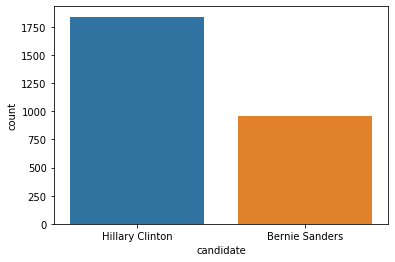

In [72]:
sns.countplot(x='candidate', data=final)
plt.savefig('dem32_result.png')